In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Stats from SciPy
from scipy import stats

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings("ignore")

import os
print(os.listdir("input"))

['data_description (1).txt', 'data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
# Load real estate data from CSV
df_train = pd.read_csv("input/train.csv", index_col=0)
df_test = pd.read_csv("input/test.csv", index_col=0)

df_test_id_test = pd.read_csv("input/test.csv")

In [4]:
# Dataframe dimensions
print("Shape of the train dataset:", df_train.shape)
print("Shape of the test dataset:", df_test.shape)

Shape of the train dataset: (1460, 80)
Shape of the test dataset: (1459, 79)


In [5]:
# The dataset contains 80 variables (including target varible - SalePrice). Training and testing dataset are split in half, each containing about 1460 examples.
# Lets see the first few rows of the training dataset.

df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Count of variables by type

data_types = pd.DataFrame(df_train.dtypes.reset_index())
data_types.columns = ["variable","type"]
data_types.groupby("type").count()

,variable
type,
int64,34
float64,3
object,43


In [7]:
# Check statistcs of numerical features
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Check statistcs of categorical features
df_train.describe(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


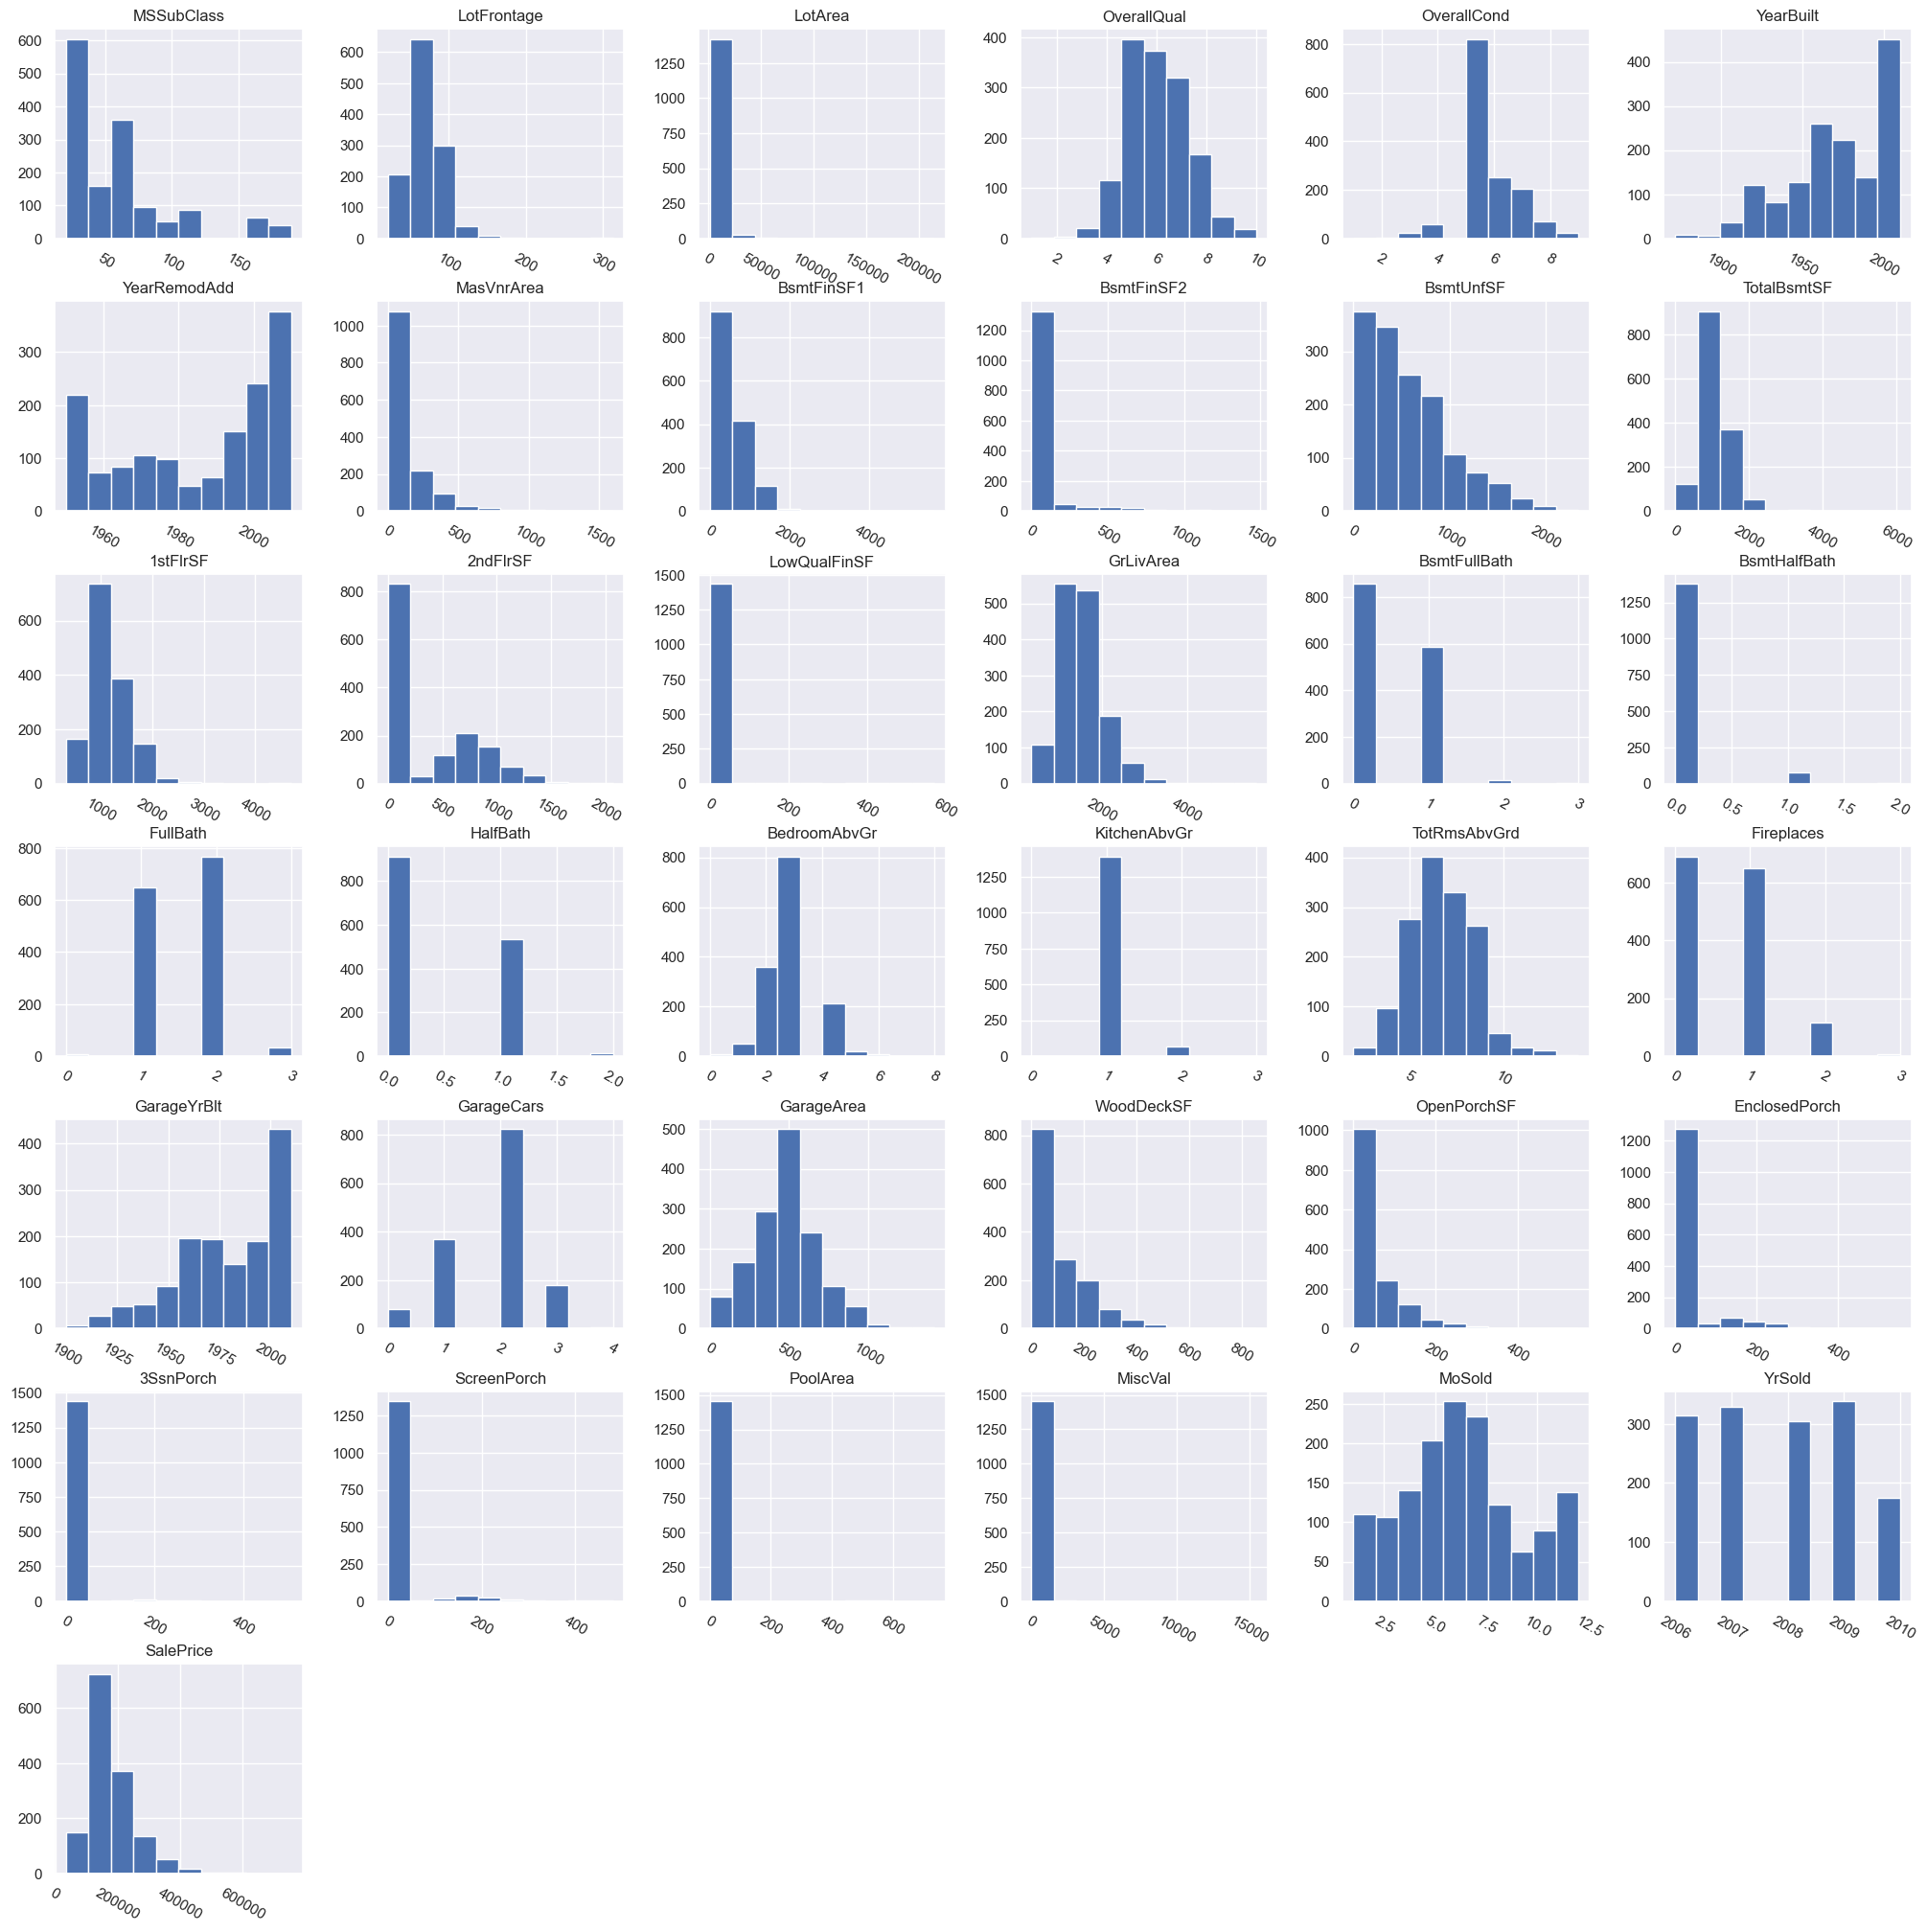

In [9]:
# Plot histogram grid
df_train.hist(figsize=(25,25), xrot=-30)

# Clear the text "residue"
plt.show()

In [10]:
# Let's check variables with missing values

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent of missing'])
missing_data.head(20)

,Total,Percent of missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [11]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df_train[col].fillna('None',inplace=True)
    df_test[col].fillna('None',inplace=True)

In [12]:
# Let's again check variables with missing values after

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent of missing'])
missing_data.head(5)

,Total,Percent of missing
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
MSSubClass,0,0.000000
KitchenAbvGr,0,0.000000


In [13]:
# fillna with mean or mode for the remaining values
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
df_train.fillna(df_train.mode(), inplace=True)
df_test.fillna(df_test.mode(), inplace=True)

In [14]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent of missing'])
missing_data.head(5)

,Total,Percent of missing
MSSubClass,0,0.0
MSZoning,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


In [15]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  37
Number of Categorical features:  43


In [16]:
correlations_list = list()
target = 'SalePrice'
li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]

for i in range(0,len(li_plot_num_feats)):
    stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
    correlations_list.append([li_plot_num_feats[i],stp[0],stp[1]])
            
numeric_correlations = pd.DataFrame(data=correlations_list ,columns=["variable","r","p"])
numeric_correlations.sort_values(by="r", ascending=False, inplace=True)
numeric_correlations.reset_index(drop=True, inplace=True)


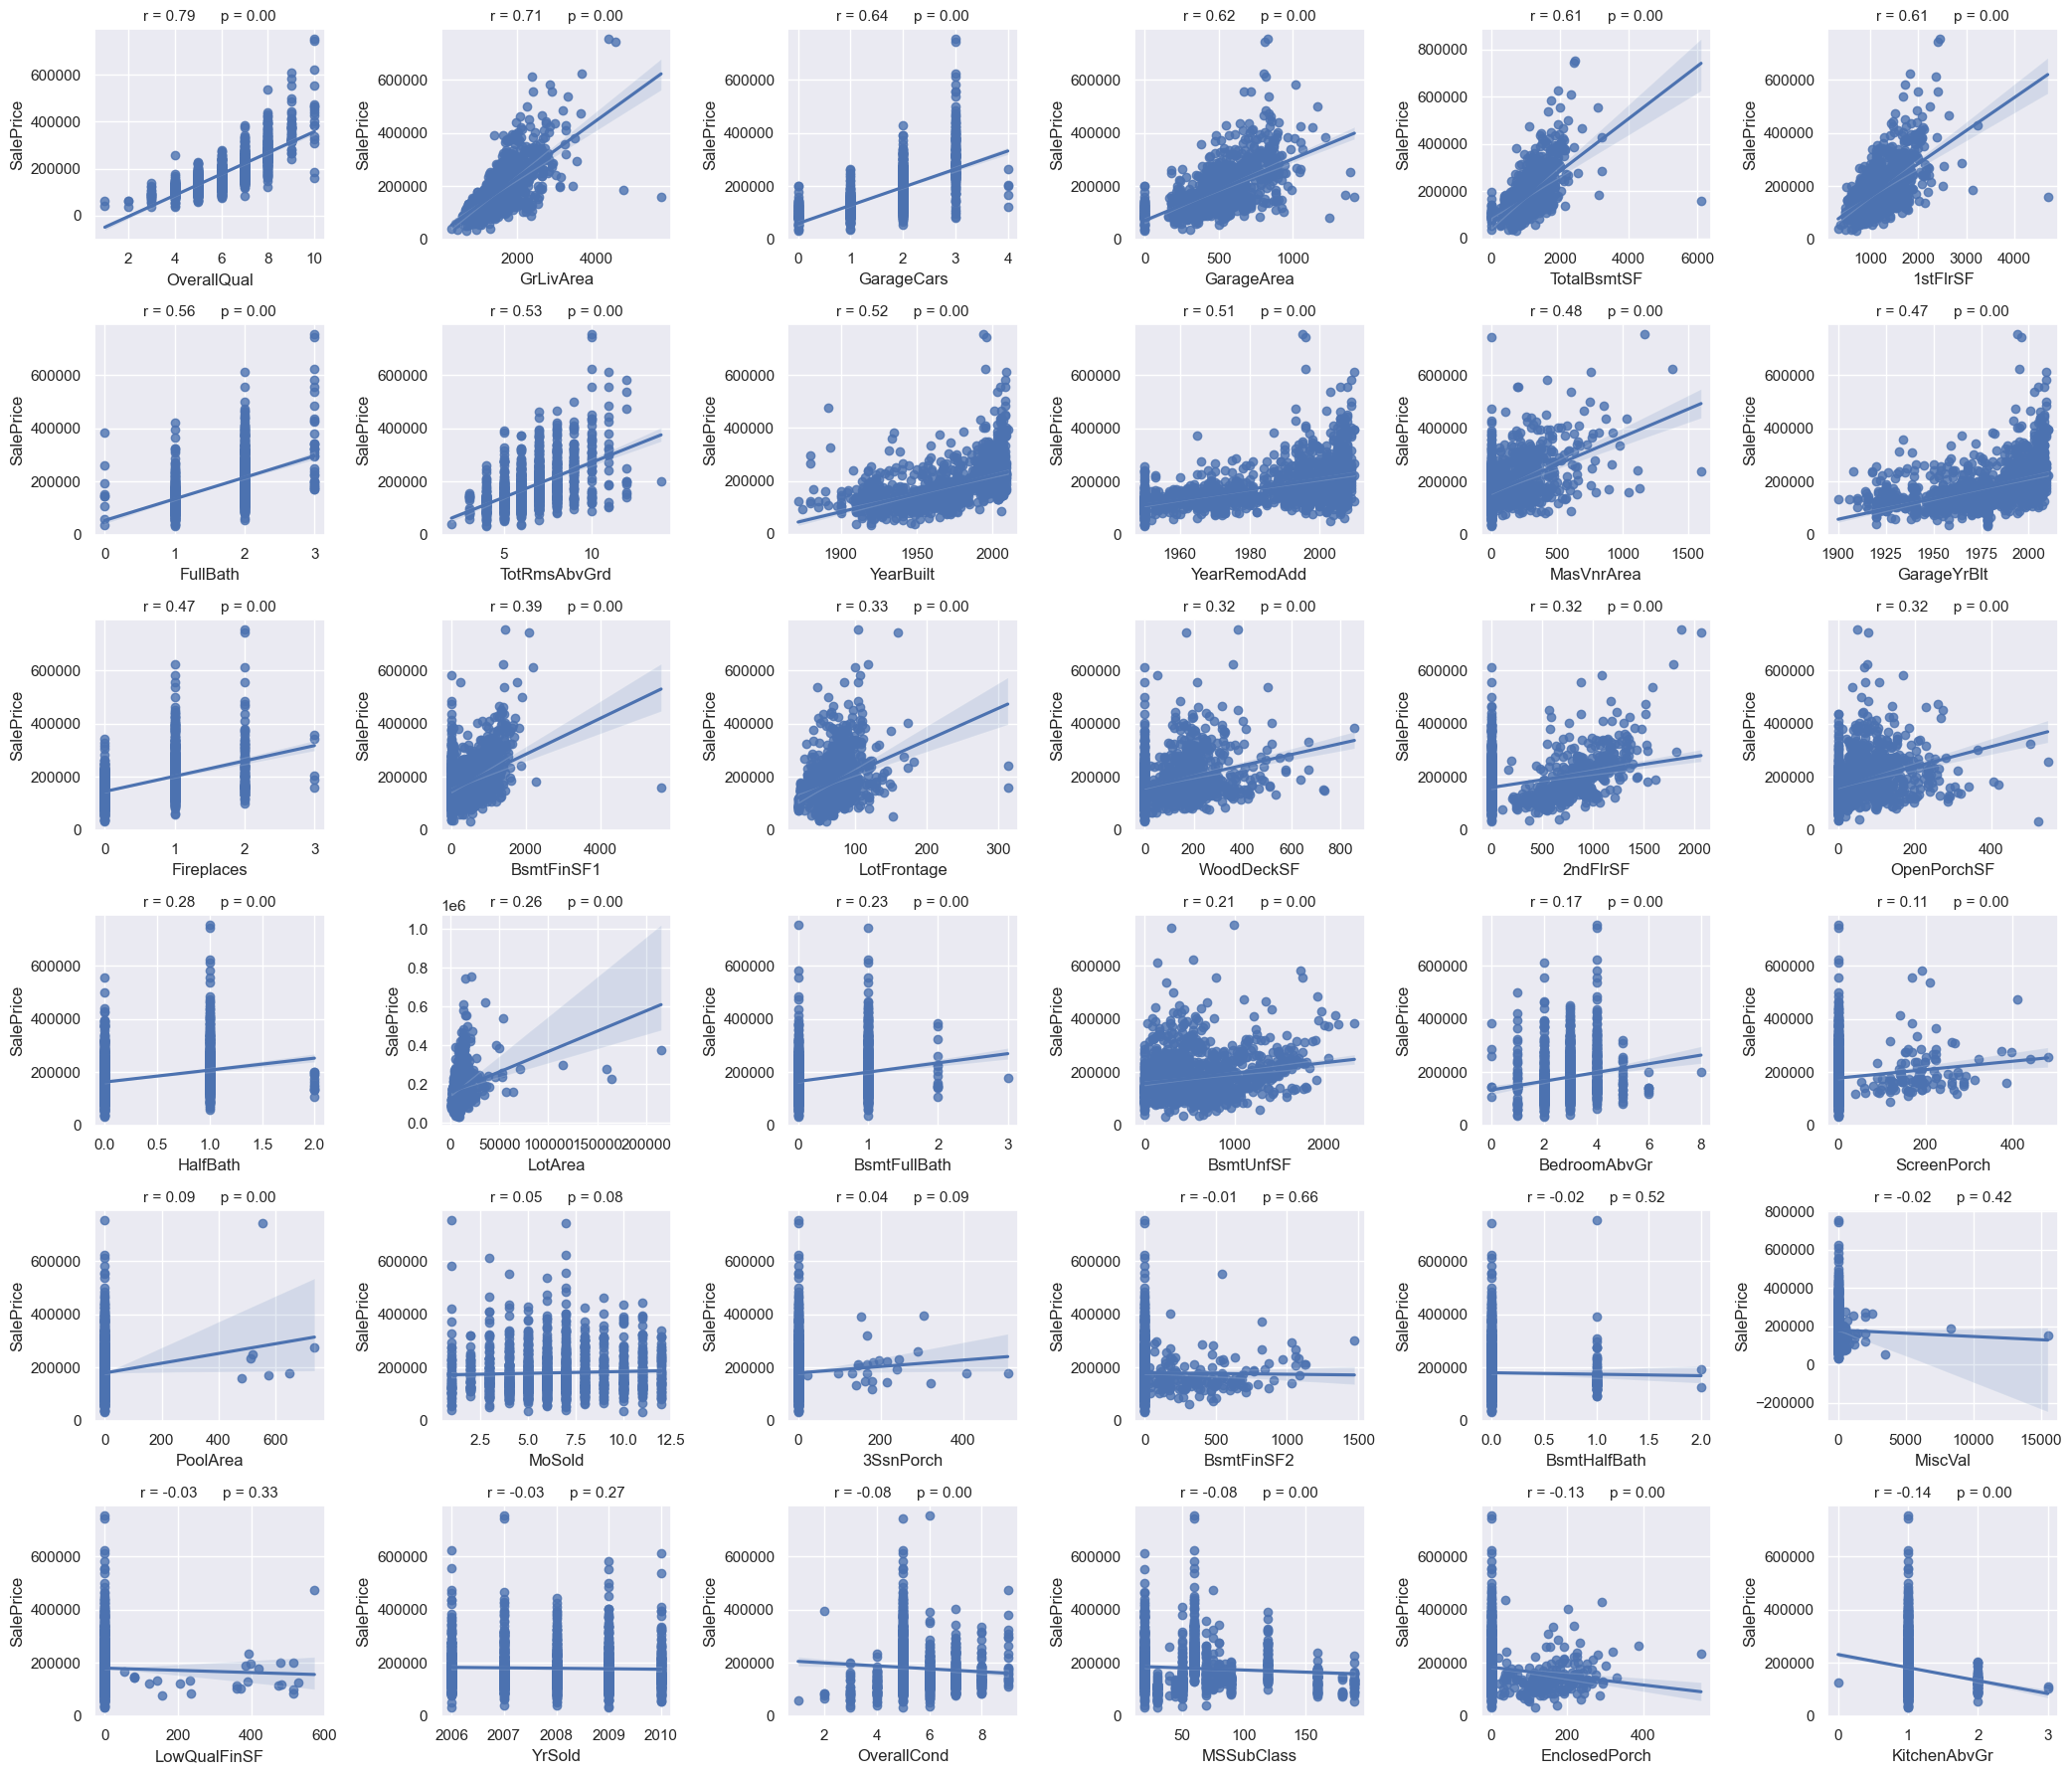

In [22]:
nr_rows = 6
nr_cols = 6

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

target = 'SalePrice'
li_num_feats = list(numerical_feats)
li_not_plot = ['Id', 'SalePrice']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x=df_train[numeric_correlations.at[i,"variable"]], y=df_train[target], ax = axs[r][c])
            str_title = "r = " + "{0:.2f}".format(numeric_correlations.at[i,"r"]) + "      " "p = " + "{0:.2f}".format(numeric_correlations.at[i,"p"])
            axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout()
plt.show()

In [23]:
# Correlation coefficient threshold
min_val_corr = 0.4

corr = df_train.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

In [24]:
print(ser_corr)
print("*"*50)
print(f"List of numerical features with r above {min_val_corr}:")
print(cols_abv_corr_limit)
print("*"*50)
print(f"List of numerical features with r below {min_val_corr}:")
print(cols_bel_corr_limit)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64
******

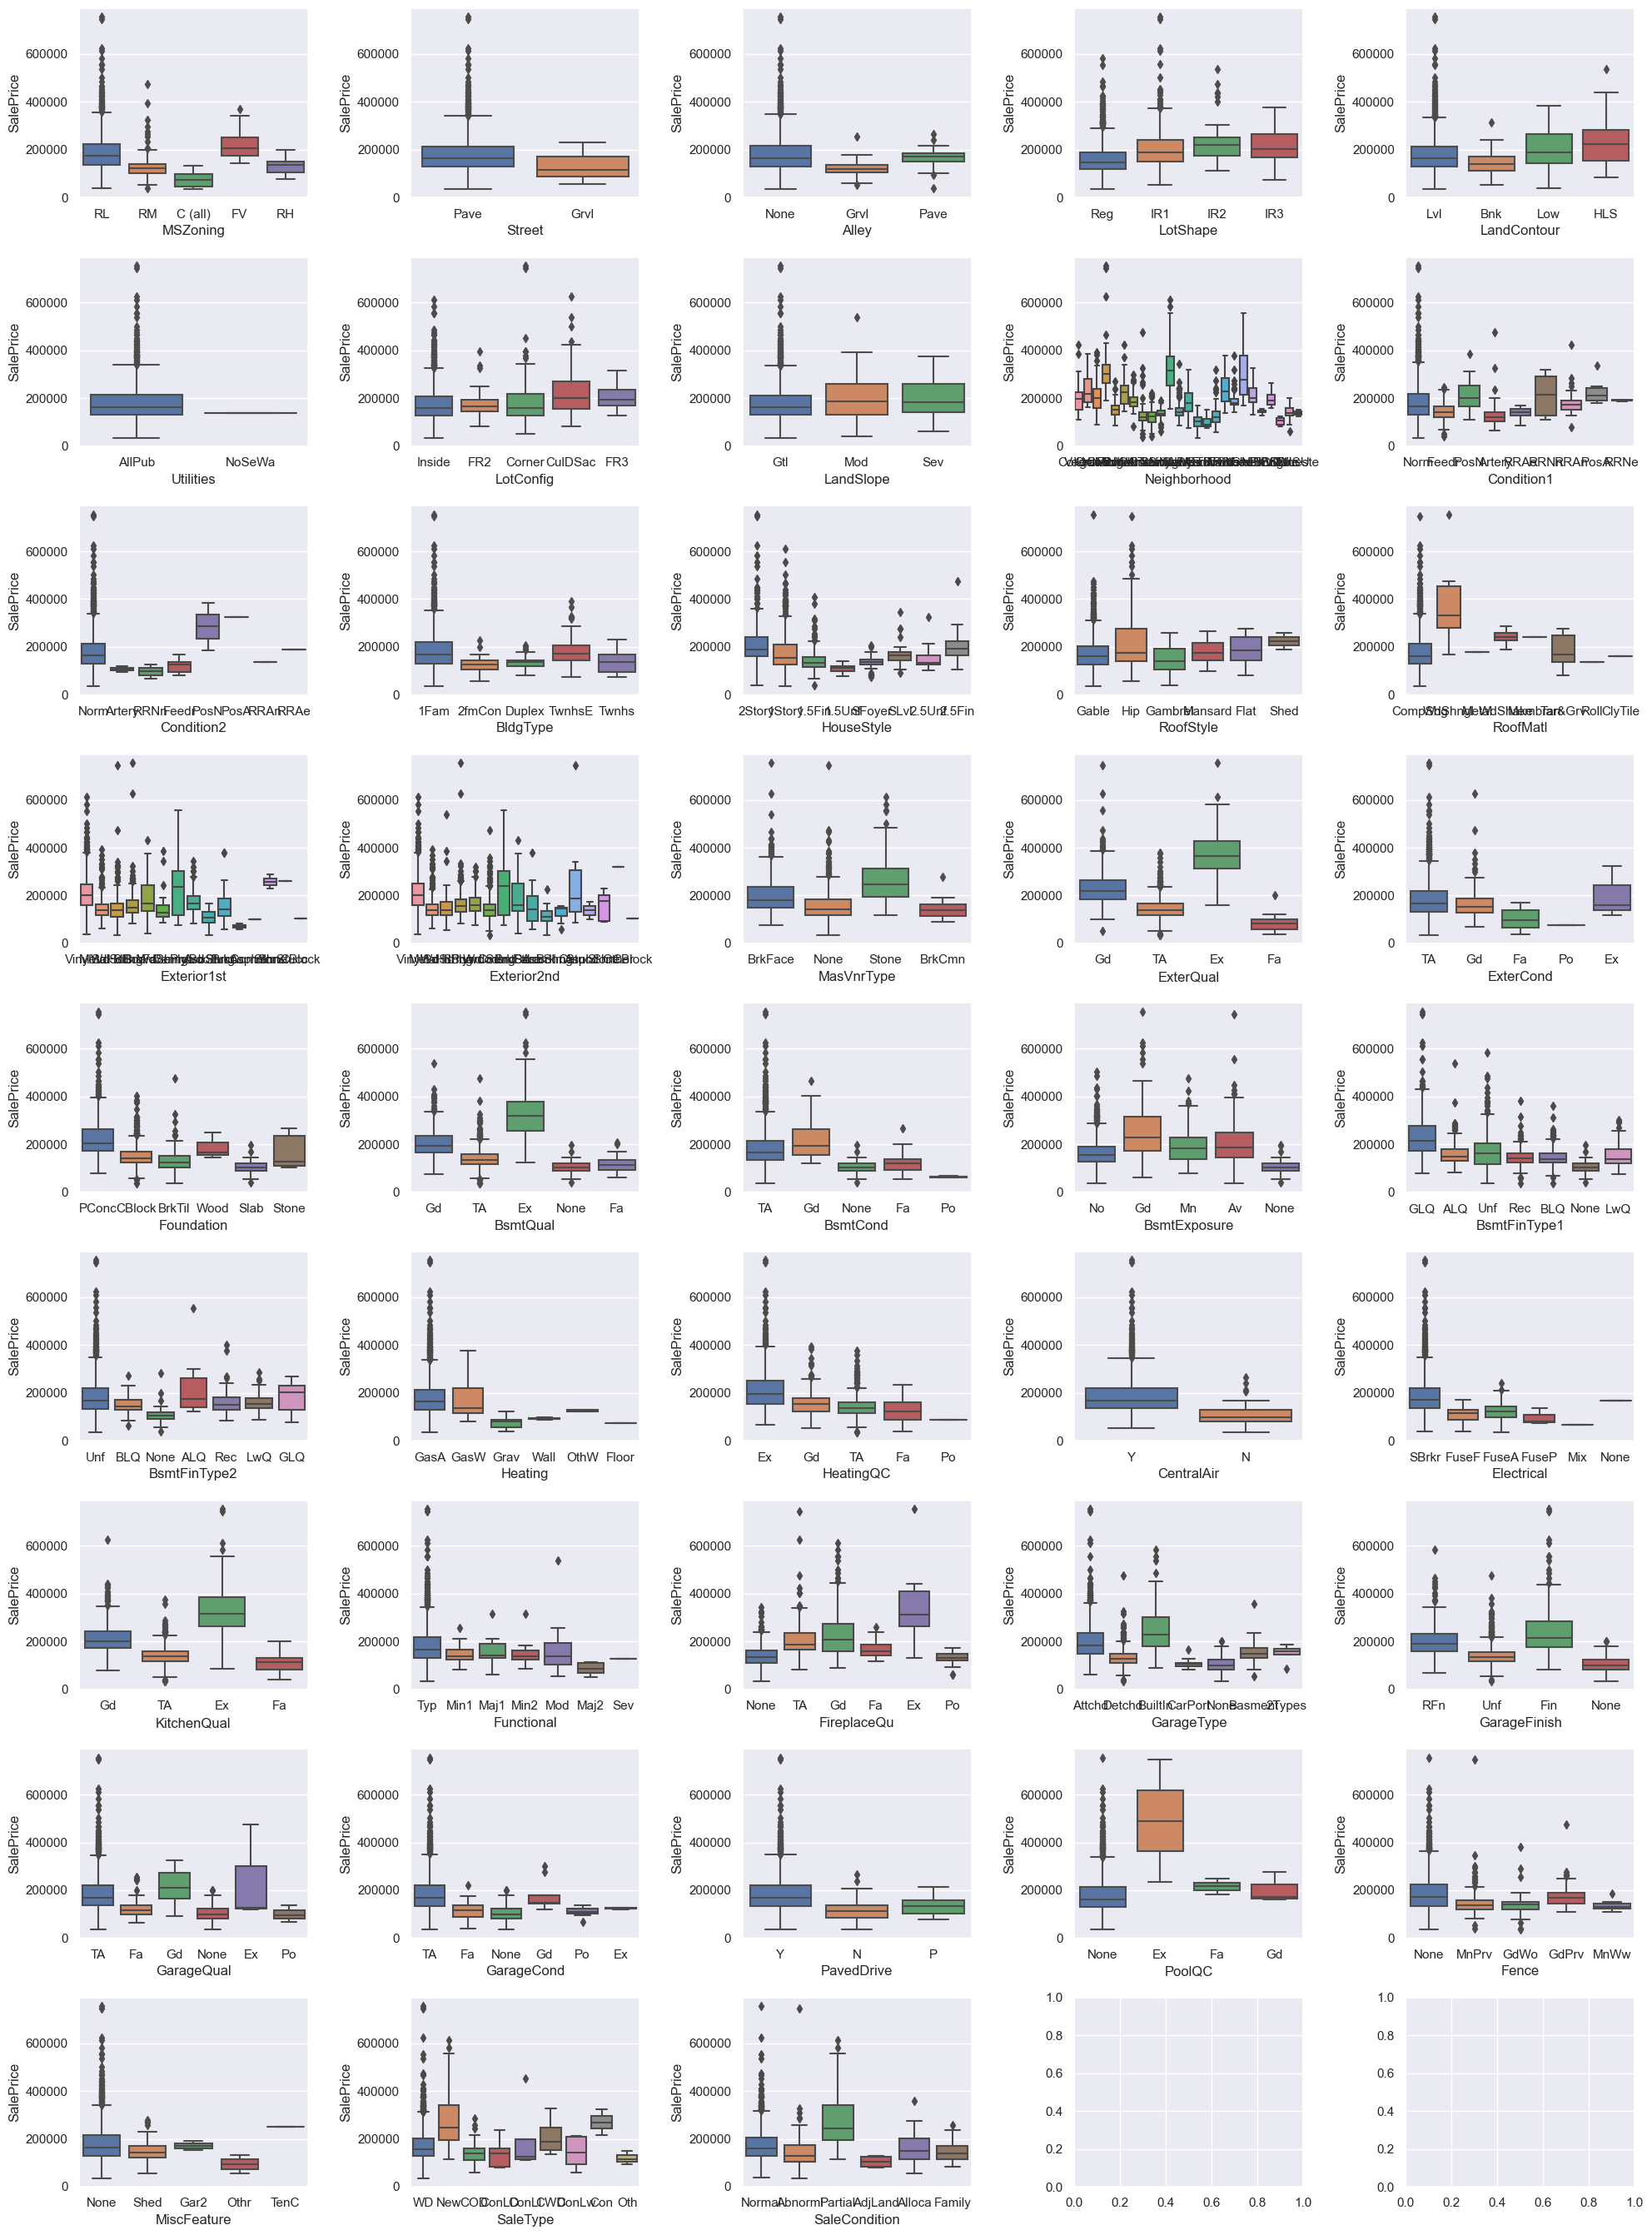

In [25]:
# Let's plot some boxplots

li_cat_feats = list(categorical_feats)
nr_rows = 9
nr_cols = 5
target = "SalePrice"

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

In [26]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition']

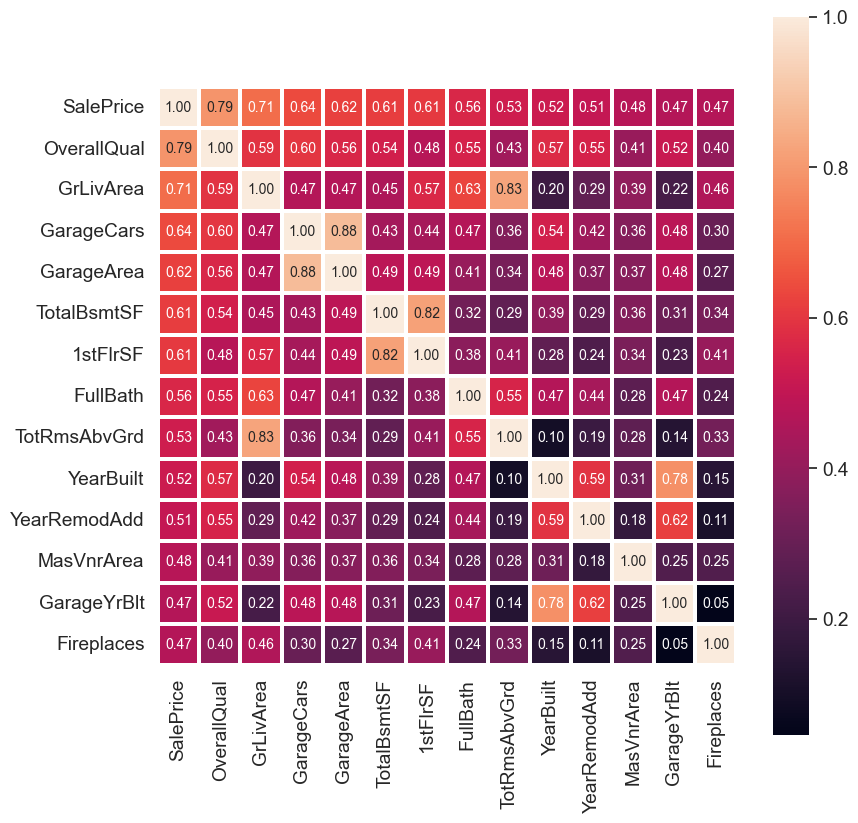

In [27]:
def plot_corr_matrix(df, nr_c, targ):
    """
    Plot correlation matrix
    """
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()

nr_feats = len(cols_abv_corr_limit)
plot_corr_matrix(df_train, nr_feats, target)

In [28]:
id_test = df_test_id_test['Id']

In [29]:
to_drop_num  = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

# cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

cols_to_drop = to_drop_num + to_drop_catg 

for df in [df_train, df_test]:
    df.drop(cols_to_drop, inplace= True, axis = 1)

In [30]:
df_train.head()

,MSZoning,Neighborhood,Condition2,OverallQual,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SaleType,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,CollgCr,Norm,7,2003,2003,BrkFace,196.0,Gd,Gd,856,Y,SBrkr,856,1710,2,Gd,8,0,2003.0,2,548,WD,208500
2,RL,Veenker,Norm,6,1976,1976,None,0.0,TA,Gd,1262,Y,SBrkr,1262,1262,2,TA,6,1,1976.0,2,460,WD,181500
3,RL,CollgCr,Norm,7,2001,2002,BrkFace,162.0,Gd,Gd,920,Y,SBrkr,920,1786,2,Gd,6,1,2001.0,2,608,WD,223500
4,RL,Crawfor,Norm,7,1915,1970,None,0.0,TA,TA,756,Y,SBrkr,961,1717,1,Gd,7,1,1998.0,3,642,WD,140000
5,RL,NoRidge,Norm,8,2000,2000,BrkFace,350.0,Gd,Gd,1145,Y,SBrkr,1145,2198,2,Gd,9,1,2000.0,3,836,WD,250000


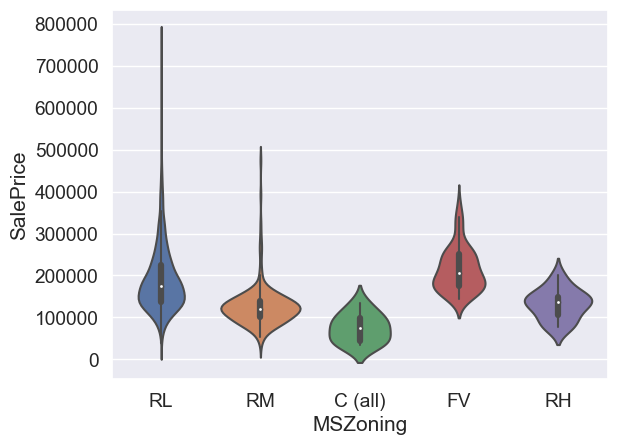

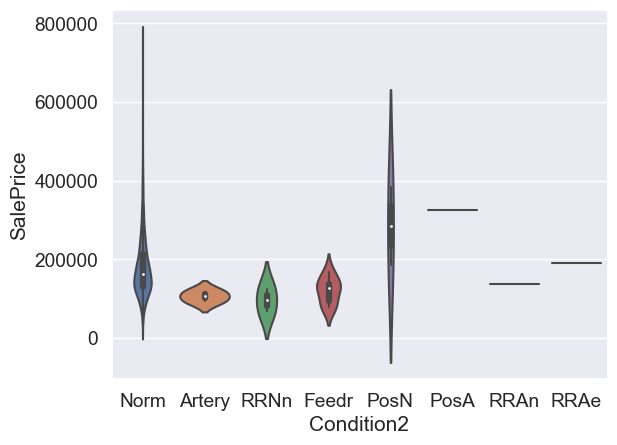

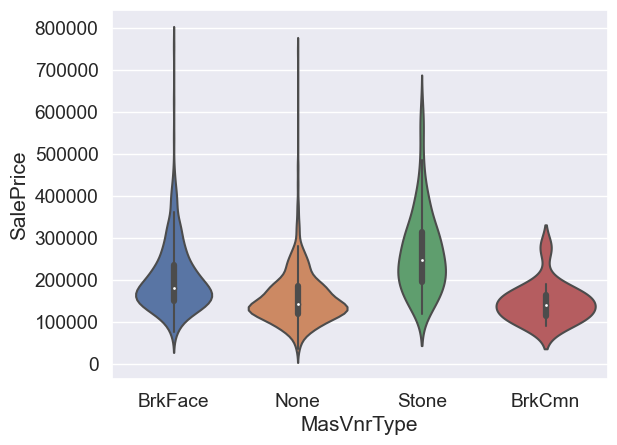

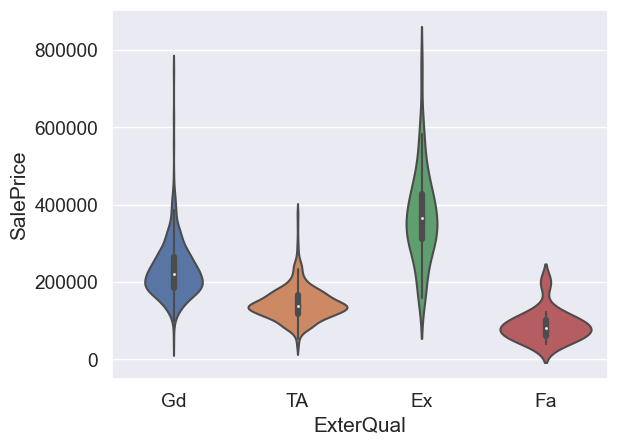

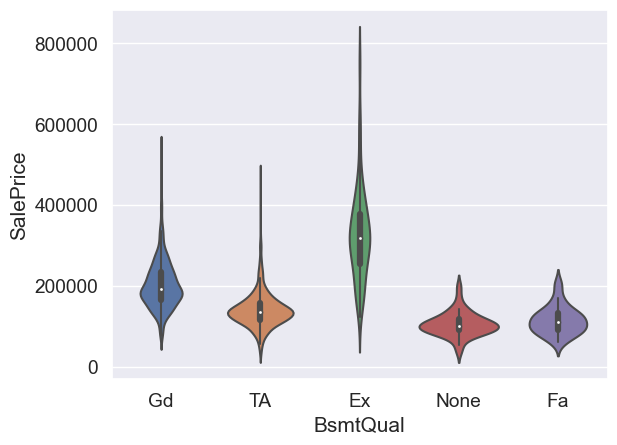

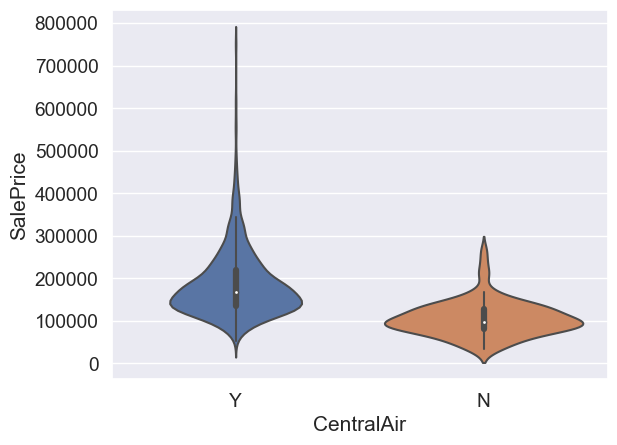

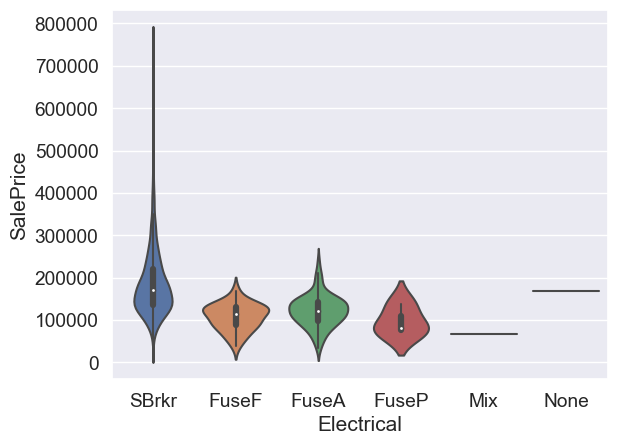

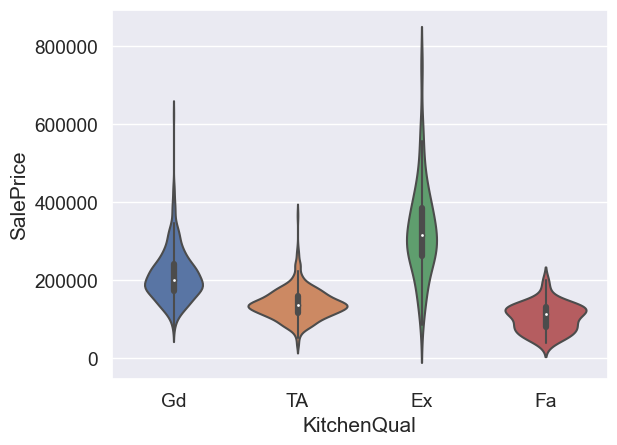

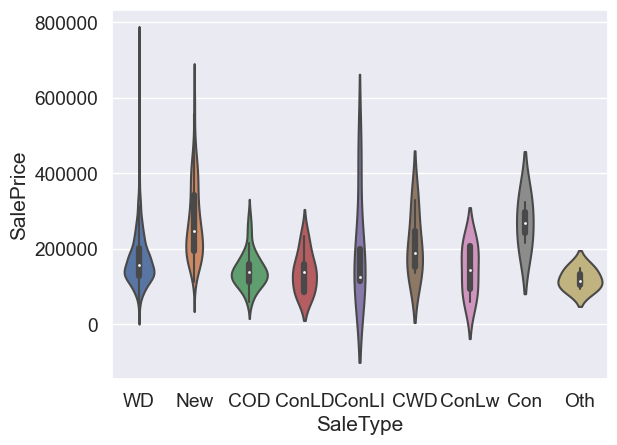

In [31]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=df_train)
    plt.show()

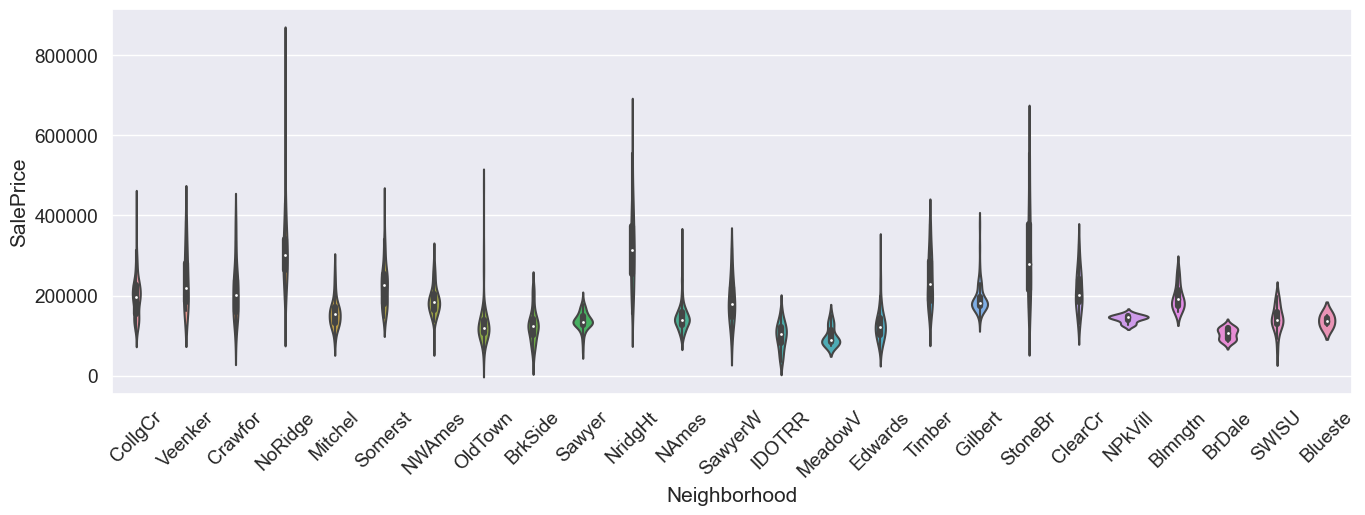

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=target, data=df_train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [33]:
for catg in catg_list :
    g = df_train.groupby(catg)[target].mean()
    print(g)

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64
Condition2
Artery    106500.000000
Feedr     121166.666667
Norm      181169.405536
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
RRAn      136905.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64
MasVnrType
BrkCmn     146318.066667
BrkFace    204691.871910
None       156958.243119
Stone      265583.625000
Name: SalePrice, dtype: float64
ExterQual
Ex    367360.961538
Fa     87985.214286
Gd    231633.510246
TA    144341.313466
Name: SalePrice, dtype: float64
BsmtQual
Ex      327041.041322
Fa      115692.028571
Gd      202688.478964
None    105652.891892
TA      140759.818182
Name: SalePrice, dtype: float64
CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64
Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000

In [34]:
# Let's make new categories

# MSZoning
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 

# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']


for df in [df_train, df_test]:    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  


In [35]:
correlations_list = list()
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']
target = 'SalePrice'

for i in range(0,len(new_col_num)):
    stp = stats.pearsonr(df_train[new_col_num[i]], df_train[target])
    correlations_list.append([new_col_num[i],stp[0],stp[1]])

numeric_correlations = pd.DataFrame(data=correlations_list ,columns=["variable","r","p"])
numeric_correlations.sort_values(by="r", ascending=False, inplace=True)
numeric_correlations.reset_index(drop=True, inplace=True)

numeric_correlations

,variable,r,p
0,NbHd_num,0.693937,3.165824e-210
1,ExtQ_num,0.682639,7.331707e-201
2,KiQ_num,0.659600,5.051357e-183
3,BsQ_num,0.659239,9.329200e-183
4,SlTy_num,0.362388,1.533728e-46
5,Mas_num,0.330476,1.524740e-38
6,MSZ_num,0.322199,1.283135e-36
7,CA_num,0.251328,1.809506e-22
8,Elc_num,0.241896,6.951959e-21
9,Cond2_num,0.094540,2.976022e-04


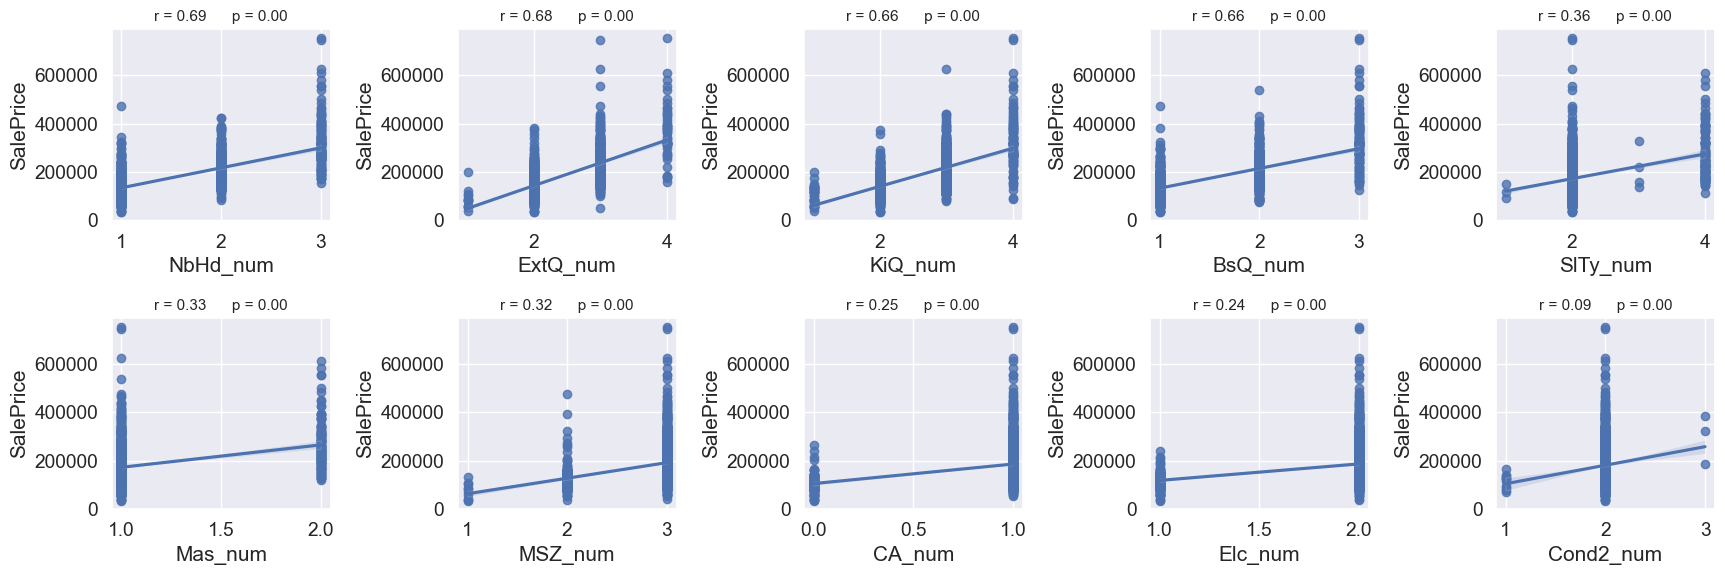

In [40]:
nr_rows = 2
nr_cols = 5

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']
target = 'SalePrice'

for r in range(0,nr_rows):
    for c in range(0,nr_cols):
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(x=df_train[numeric_correlations.at[i,"variable"]], y=df_train[target], ax = axs[r][c])
            str_title = "r = " + "{0:.2f}".format(numeric_correlations.at[i,"r"]) + "      " "p = " + "{0:.2f}".format(numeric_correlations.at[i,"p"])
            axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout()
plt.show()

In [41]:
min_val_corr = 0.4

catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

corr1 = df_train.corr()
corr_abs_1 = corr1.abs()

nr_all_cols = len(df_train)
ser_corr_1 = corr_abs_1.nlargest(nr_all_cols, target)[target]

cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= min_val_corr].index)

for df in [df_train, df_test] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace= True, axis = 1)   
    
corr2 = df_train.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(df_train)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
NbHd_num        0.693937
ExtQ_num        0.682639
KiQ_num         0.659600
BsQ_num         0.659239
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
Name: SalePrice, dtype: float64


In [42]:
df_train.head()

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
Id,,,,,,,,,,,,,,,,,,,
1,RL,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500,2,3,2,3
2,RL,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500,2,2,2,2
3,RL,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500,2,3,2,3
4,RL,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000,2,2,1,3
5,RL,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000,3,3,2,3


In [43]:
df_test.head()

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
Id,,,,,,,,,,,,,,,,,,
1461,RH,5,1961,1961,0.0,882.0,896,896,1,5,0,1961.0,1.0,730.0,1,2,1,2
1462,RL,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0,1,2,1,3
1463,RL,5,1997,1998,0.0,928.0,928,1629,2,6,1,1997.0,2.0,482.0,2,2,2,2
1464,RL,6,1998,1998,20.0,926.0,926,1604,2,7,1,1998.0,2.0,470.0,2,2,1,3
1465,RL,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,1992.0,2.0,506.0,3,3,2,3


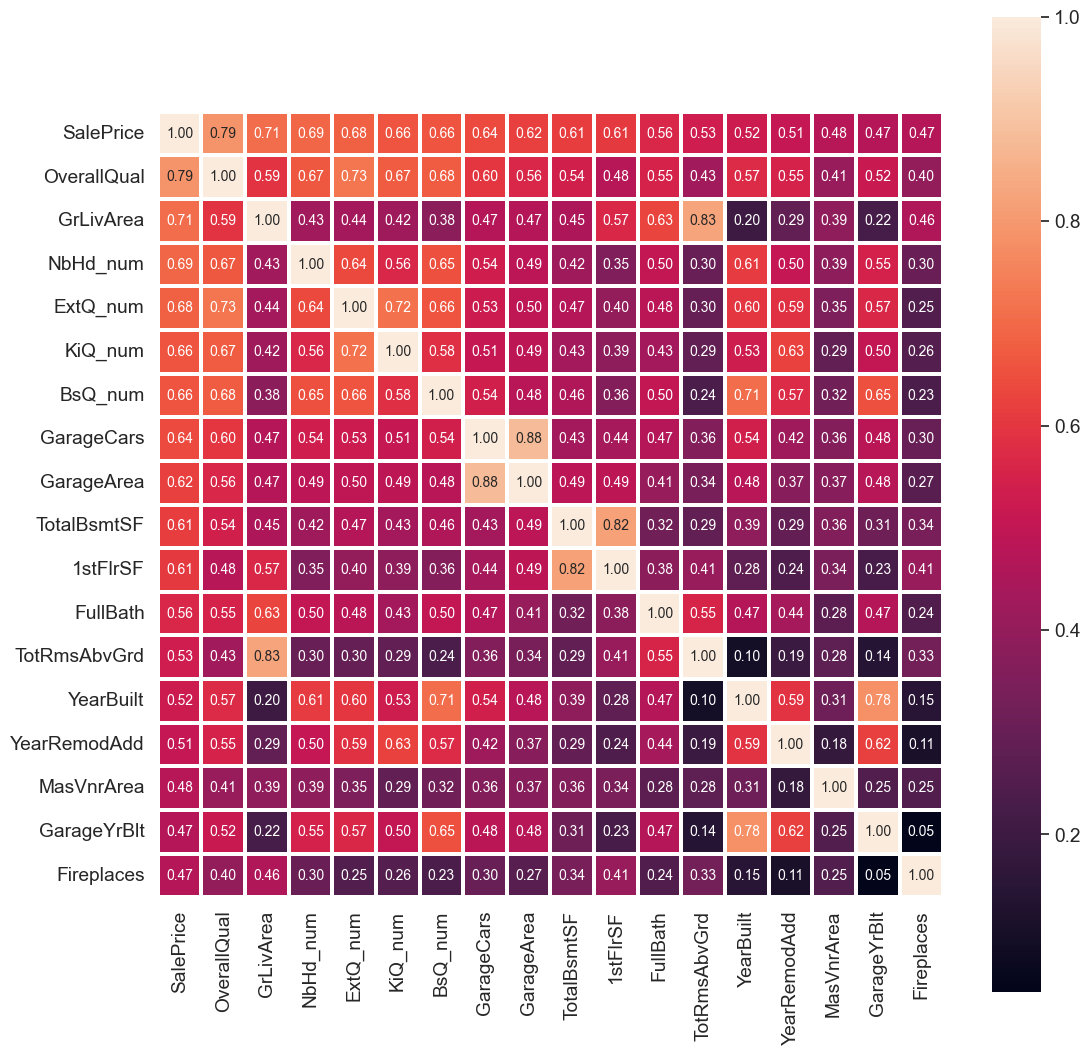

In [44]:
nr_feats=len(df_train.columns)
plot_corr_matrix(df_train, nr_feats, target)

In [45]:
cols = corr_abs_2.nlargest(nr_all_cols, target)[target].index
cols = list(cols)

for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
    if col in cols: 
        cols.remove(col)
        
cols = list(cols)
cols

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'NbHd_num',
 'ExtQ_num',
 'KiQ_num',
 'BsQ_num',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces']

In [46]:
feats = cols.copy()
feats.remove('SalePrice')

In [47]:
df_train_ml = df_train[feats].copy()
df_test_ml = df_test[feats].copy()

y = df_train[target]

print(target)

SalePrice


In [48]:
print(df_train_ml.shape)
print("*"*50)
print(df_test_ml.shape)

(1460, 13)
**************************************************
(1459, 13)


In [49]:
numerical_feats = df_train_ml.dtypes[df_train_ml.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train_ml.dtypes[df_train_ml.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  13
Number of Categorical features:  0


In [50]:
df_all = pd.concat([df_train_ml, df_test_ml])

len_train = df_train_ml.shape[0]

xtrain = df_all[:len_train]
xtest = df_all[len_train:]

In [51]:
# Dataframe dimensions
print(xtrain.shape)
print("*"*50)
print(xtest.shape)

(1460, 13)
**************************************************
(1459, 13)


In [52]:
xtrain.head()

,OverallQual,GrLivArea,NbHd_num,ExtQ_num,KiQ_num,BsQ_num,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces
Id,,,,,,,,,,,,,
1,7,1710,2,3,3,2,2.0,856.0,2,2003,2003,196.0,0
2,6,1262,2,2,2,2,2.0,1262.0,2,1976,1976,0.0,1
3,7,1786,2,3,3,2,2.0,920.0,2,2001,2002,162.0,1
4,7,1717,2,2,3,1,3.0,756.0,1,1915,1970,0.0,1
5,8,2198,3,3,3,2,3.0,1145.0,2,2000,2000,350.0,1


In [53]:
xtest.head()

,OverallQual,GrLivArea,NbHd_num,ExtQ_num,KiQ_num,BsQ_num,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces
Id,,,,,,,,,,,,,
1461,5,896,1,2,2,1,1.0,882.0,1,1961,1961,0.0,0
1462,6,1329,1,2,3,1,1.0,1329.0,1,1958,1958,108.0,0
1463,5,1629,2,2,2,2,2.0,928.0,2,1997,1998,0.0,1
1464,6,1604,2,2,3,1,2.0,926.0,2,1998,1998,20.0,1
1465,8,1280,3,3,3,2,2.0,1280.0,2,1992,1992,0.0,0


In [62]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [63]:
# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
data_scaled = scaler.fit_transform(df_all)

# Display first row of item_data_scaled
data_scaled[:1]

array([[ 0.6461834 ,  0.41354722,  0.68128116,  1.03980539,  0.73886912,
         0.63229908,  0.30652802, -0.44432336,  0.78136581,  1.0462576 ,
         0.89683293,  0.52522191, -0.92431121]])

In [64]:
# Initialize instance of PCA transformation
from sklearn.decomposition import PCA
pca = PCA()

# Fit the instance
pca.fit(data_scaled)

PCA()

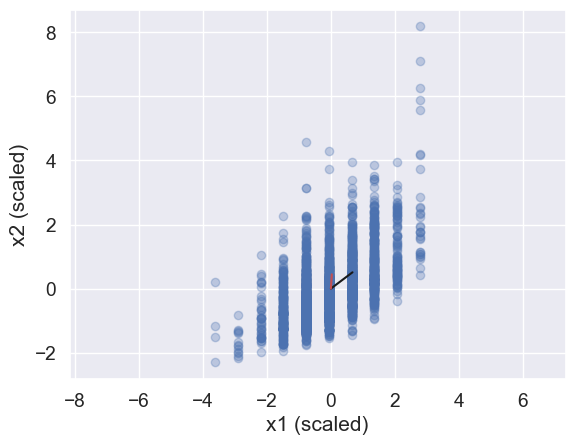

In [65]:
# Plot scaled dataset and make it partially transparent
plt.scatter(data_scaled[:,0], data_scaled[:,1], alpha=0.3)

# Plot first principal component in black
plt.plot([0, 2*pca.components_[0,0]], [0, 2*pca.components_[0,1]], 'k')

# Plot second principal component in red
plt.plot([0, pca.components_[1,0]], [0, pca.components_[1,1]], 'r')

# Set axes
plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')

# Clear text residue
plt.show()

In [66]:
# Generate new features
PC = pca.transform(data_scaled)

# Display first 5 rows
PC[:5]

array([[ 1.9673    , -1.27387024,  0.31453172,  0.91868868,  0.31036951,
        -0.53755743,  0.0283162 , -0.15424466,  0.14678912, -0.00897049,
        -0.158935  , -0.10480673,  0.32716275],
       [ 0.15516919,  0.31463021,  0.374011  , -0.26998748, -1.47067565,
         0.53465804, -0.62490357, -0.41076639, -0.1942882 , -0.14810977,
         0.17299834,  0.10862132, -0.73169902],
       [ 2.2283517 , -0.35627821,  0.44887385, -0.2005367 ,  0.02587742,
        -0.78182448, -0.20755867,  0.04394637,  0.27146629, -0.15620793,
        -0.17757102,  0.05830868,  0.28079652],
       [-0.46298207,  1.25519645,  0.30175742, -0.96960305,  0.2894396 ,
        -0.399913  ,  2.37299545, -1.0432752 , -1.08714095,  0.077544  ,
         0.45330284, -0.47815807, -0.52547689],
       [ 3.81004337,  0.55571337, -0.03532833,  0.55675933, -0.40146664,
        -0.90017089,  0.52200446, -0.62335775, -0.80099907, -0.08522511,
        -0.13585927, -0.14159393,  0.34234151]])

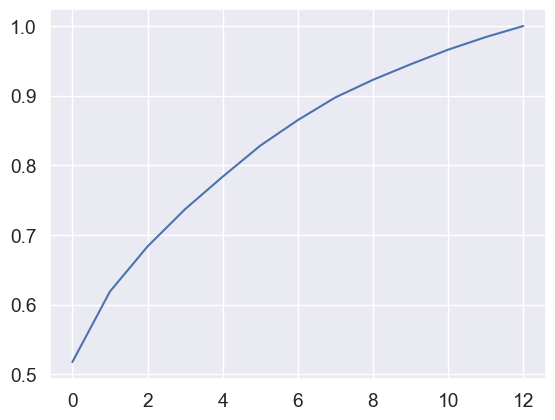

In [67]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [68]:
# How much variance we'd capture with the first 7 components
cumulative_explained_variance[7]

0.8974999459805859

In [69]:
# Initialize PCA transformation, only keeping 8 components
n_pca_components = 7

pca = PCA(n_components=n_pca_components)

# Fit and transform item_data_scaled
pc_items = pca.fit_transform(data_scaled)

# Display shape of PC_items
pc_items.shape

(2919, 7)

In [70]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(pc_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(pc_items.shape[1])]

# Update its index
items_pca.index = df_all.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Id,,,,,,,
1,1.967300,-1.273870,0.314532,0.918689,0.310370,-0.537557,0.028316
2,0.155169,0.314630,0.374011,-0.269987,-1.470676,0.534658,-0.624904
3,2.228352,-0.356278,0.448874,-0.200537,0.025877,-0.781824,-0.207559
4,-0.462982,1.255196,0.301757,-0.969603,0.289440,-0.399913,2.372995
5,3.810043,0.555713,-0.035328,0.556759,-0.401467,-0.900171,0.522004


In [71]:
len_train = df_train_ml.shape[0]

pca_xtrain = items_pca[:len_train]
pca_xtest = items_pca[len_train:]

In [72]:
# Dataframe dimensions
print(pca_xtrain.shape)
print("*"*50)
print(pca_xtest.shape)

(1460, 7)
**************************************************
(1459, 7)


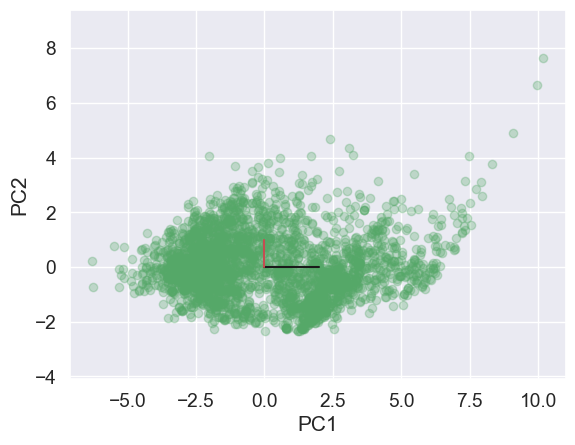

In [73]:
# Plot transformed dataset
plt.scatter(PC[:,0], PC[:,1], alpha=0.3, color='g')

# Plot first principal component in black
plt.plot([0, 2], [0, 0], 'k')

# Plot second principal component in red
plt.plot([0, 0], [0, 1], 'r')

# Set axes
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Clear text residue
plt.show()

In [74]:
# Display explained variance ratio
pca.explained_variance_ratio_

array([0.51759607, 0.10115734, 0.06469328, 0.0535586 , 0.04666667,
       0.04450862, 0.03674993])

In [75]:
# Scikit-Learn for Modeling
import sklearn

# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [76]:
X = pca_xtrain.copy()
y = df_train[target]

In [77]:
# Split X and y into train and test sets
X_train = pca_xtrain.copy()
X_test = pca_xtest.copy()
y_train = df_train[target]

In [78]:
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Id,,,,,,,
1,1.967300,-1.273870,0.314532,0.918689,0.310370,-0.537557,0.028316
2,0.155169,0.314630,0.374011,-0.269987,-1.470676,0.534658,-0.624904
3,2.228352,-0.356278,0.448874,-0.200537,0.025877,-0.781824,-0.207559
4,-0.462982,1.255196,0.301757,-0.969603,0.289440,-0.399913,2.372995
5,3.810043,0.555713,-0.035328,0.556759,-0.401467,-0.900171,0.522004


In [79]:
# Create pipelines dictionary

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf'    : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb'    : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}

In [80]:
## NOTE: once best parameters were determined the rest were remove from RF and XGB model to save time when running the code

# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [200, 300, 400],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [500],
    'gradientboostingregressor__learning_rate' : [0.01, 0.02],
    'gradientboostingregressor__max_depth': [1, 3]
}

# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [84]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [87]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.7934288063710679
ridge 0.7935899218419682
enet 0.7936643888159702
rf 0.827588344393819
gb 0.8205999632102594


In [88]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_, model.best_params_)

lasso 0.7934288063710679 {'lasso__alpha': 10}
ridge 0.7935899218419682 {'ridge__alpha': 10}
enet 0.7936643888159702 {'elasticnet__alpha': 0.05, 'elasticnet__l1_ratio': 0.7}
rf 0.827588344393819 {'randomforestregressor__max_features': 'auto', 'randomforestregressor__n_estimators': 300}
gb 0.8205999632102594 {'gradientboostingregressor__learning_rate': 0.02, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__n_estimators': 500}


In [89]:
X = xtrain.copy()
y = df_train[target]

In [90]:
# Split X and y into train and test sets
X_train = xtrain.copy()
X_test = xtest.copy()
y_train = df_train[target]

In [91]:
X_train.head()

,OverallQual,GrLivArea,NbHd_num,ExtQ_num,KiQ_num,BsQ_num,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces
Id,,,,,,,,,,,,,
1,7,1710,2,3,3,2,2.0,856.0,2,2003,2003,196.0,0
2,6,1262,2,2,2,2,2.0,1262.0,2,1976,1976,0.0,1
3,7,1786,2,3,3,2,2.0,920.0,2,2001,2002,162.0,1
4,7,1717,2,2,3,1,3.0,756.0,1,1915,1970,0.0,1
5,8,2198,3,3,3,2,3.0,1145.0,2,2000,2000,350.0,1


In [92]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [93]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.8073387872813754
ridge 0.8075214063128179
enet 0.8080509519699435
rf 0.871524705070302
gb 0.8765615736739338


In [94]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_, model.best_params_)

lasso 0.8073387872813754 {'lasso__alpha': 10}
ridge 0.8075214063128179 {'ridge__alpha': 10}
enet 0.8080509519699435 {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.3}
rf 0.871524705070302 {'randomforestregressor__max_features': 0.33, 'randomforestregressor__n_estimators': 200}
gb 0.8765615736739338 {'gradientboostingregressor__learning_rate': 0.02, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__n_estimators': 500}
